In [ ]:
!pip install datapackage

In [1]:
from datapackage import Package
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import requests
import io

# Read Data from Online Data Source

In [2]:
# get time series data from datahub.io
data_url = 'https://datahub.io/core/covid-19/datapackage.json'
package = Package(data_url)
#package.resource_names
def read_data(file_name, resources):
    for resource in resources:
        if resource.descriptor['name'] == file_name:
            file_url = resource.descriptor['path']
            response =requests.get(file_url)
            file_object = io.StringIO(response.content.decode('utf-8'))
            data = pd.read_csv(file_object)
            data.Date = pd.to_datetime(data.Date) # convert object to date
            return data
df  = read_data('time-series-19-covid-combined_csv',package.resources)
dfc = read_data('countries-aggregated_csv',package.resources)
dfw = read_data('worldwide-aggregated_csv',package.resources)
latest_date = dfc.Date.max()

# Worldwide Infections History

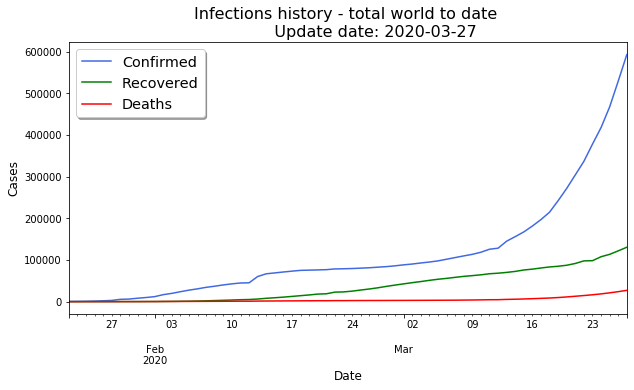

In [3]:
dfw.set_index('Date')[['Confirmed','Recovered','Deaths']].plot(figsize=(10,5), color = ['royalblue','green','red'])
plt.xlabel('Date', size=12)
plt.ylabel('Cases', size=12)
plt.title('Infections history - total world to date \n \
          Update date: {:%Y-%m-%d}'.format(latest_date),size=16)
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

# High Risk Countries/Regions 

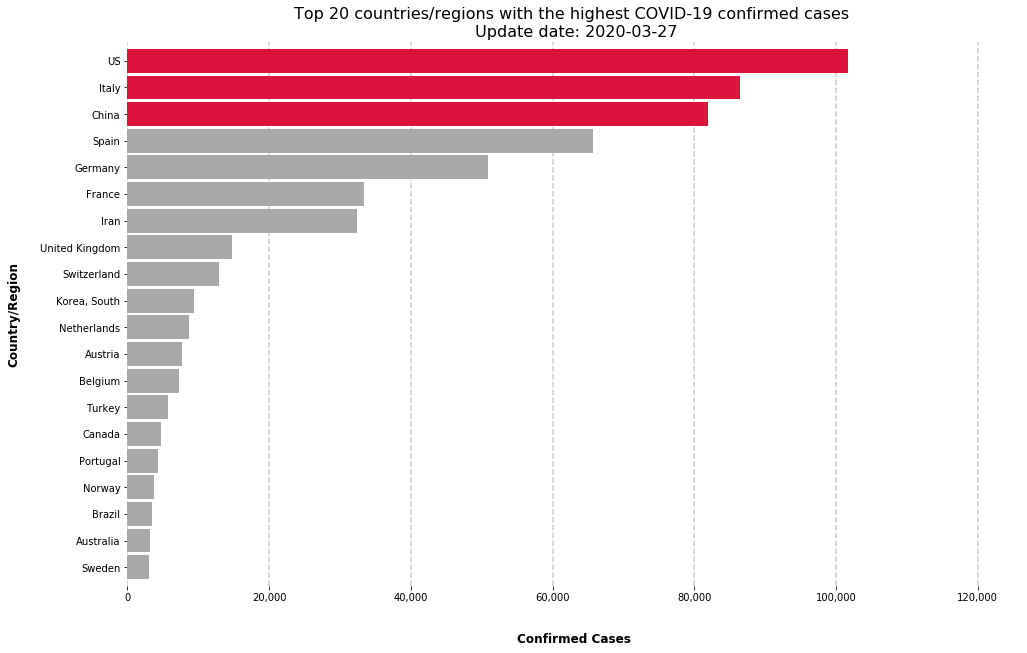

In [4]:
df20 = dfc[dfc.Date == latest_date].sort_values(by = 'Confirmed', ascending = False).head(20)
df20.set_index('Country', inplace = True)
my_colors = ['darkgray']*17+ ['crimson']*3
ax = df20['Confirmed'].sort_values().plot(kind='barh', figsize=(16, 10), color=my_colors, zorder=2, width=0.9)

#color='#86bf91'
#color = '#1f77b4'

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
     ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#7f7f7f', zorder=1)
        
# Set x-axis label
ax.set_xlabel("Confirmed Cases", labelpad=30, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Country/Region", labelpad=20, weight='bold', size=12)

# Set Chart Title 
ax.set_title('Top 20 countries/regions with the highest COVID-19 confirmed cases \n Update date: {:%Y-%m-%d}'\
             .format(latest_date), size=16)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.show()

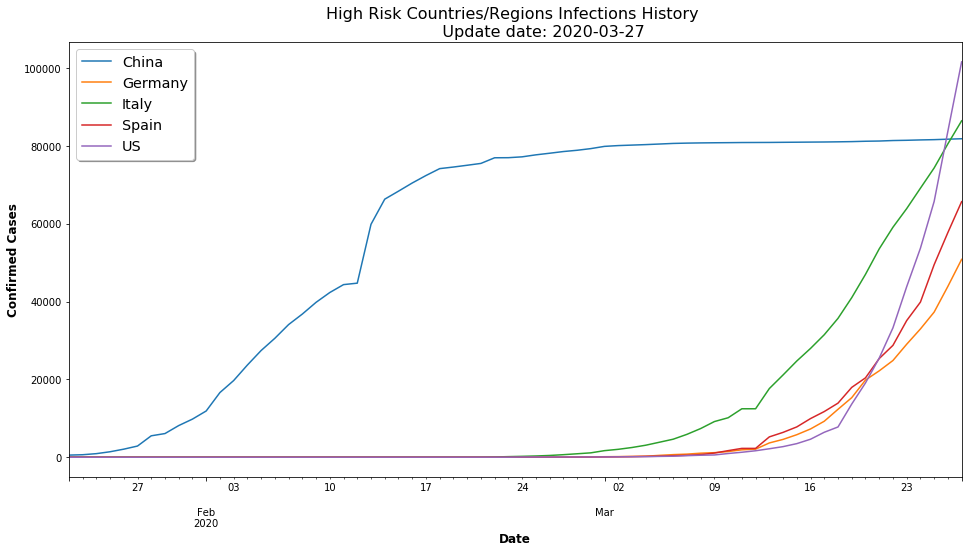

In [5]:
dfc.set_index('Date', inplace = True)
dfc[dfc['Country'].isin (df20.index[:5])] \
        .groupby('Country')['Confirmed'] \
        .plot(legend=True,figsize=(16,8))
plt.xlabel('Date',weight='bold', size=12)
plt.ylabel('Confirmed Cases',weight='bold', size=12)
plt.title('High Risk Countries/Regions Infections History \n \
          Update date: {:%Y-%m-%d}'.format(latest_date),size=16)
plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()